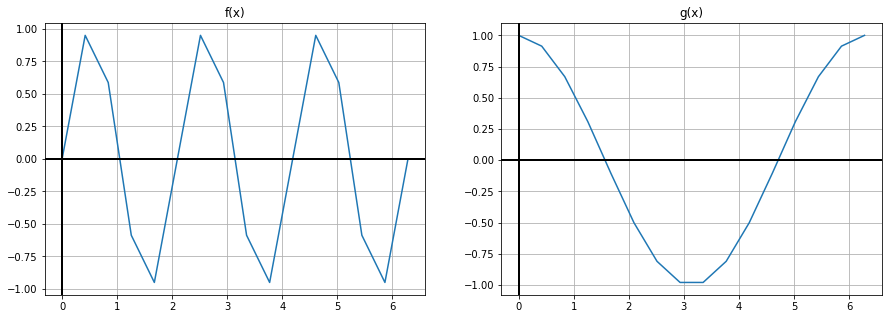

In [135]:
import scipy as sp
import pylab as pl
import numpy as np
import cmath as cm


def f(x):
    return sp.sin(3*x)

def g(x):
    return sp.cos(x)

N = 16
period = cm.pi * 2

x = np.linspace(0, 2 * np.pi, N)
f_y = list(map(f, x))
g_y = list(map(g, x))


pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(x, f_y)
pl.title("f(x)")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(x, g_y)
pl.title("g(x)")
pl.grid()
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.show()

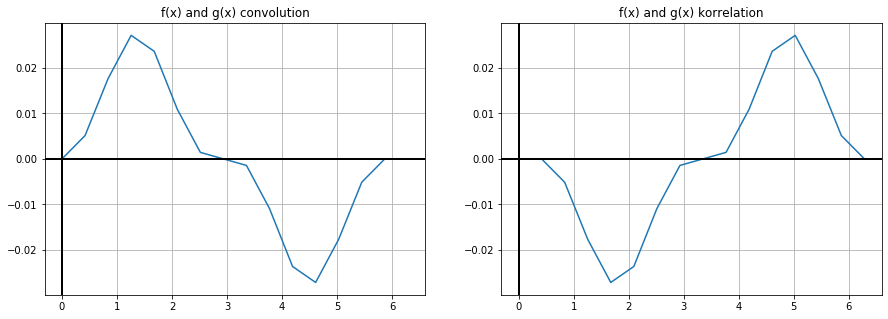

In [136]:
#mine
def korrelation(f, g, N, period):
    count_sum = 0
    count_mul = 0
    kor = []
    float_n = float(N)
    for m in range(N):        
        kor.append(0)
        for h in range(N):
            kor[m] += f[h] * g[(m+h)%N]
            count_sum+=1
            count_mul+=1
    return ([x/N for x in kor],  count_sum, count_mul)

#mine
def convolution(f, g, N, period):
    kor = []
    count_sum = 0
    count_mul = 0
    float_n = float(N)
    for m in range(N):        
        kor.append(0)
        for h in range(N):
            g_x = m-h
            if (g_x < 0):
                g_x += N
            kor[m] += f[h] * g[g_x]
            count_sum+=1
            count_mul+=1
    return ([x/N for x in kor], count_sum, count_mul)


#mine
classic_korrelation, count_sum_korr, count_mul_korr = korrelation(f_y, g_y, N, period)
classic_convolution, count_sum_conv, count_mul_conv = convolution(f_y, g_y, N, period)



pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(x, classic_convolution)
pl.title("f(x) and g(x) convolution")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(x, classic_korrelation)
pl.title("f(x) and g(x) korrelation")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()
pl.show()

In [137]:
def fft(xs):
    N_ = len(xs)
    cs = np.array(xs, dtype=complex)
    if N_ == 1:
        return xs
    even = fft(xs[::2])
    odd = fft(xs[1::2])
    wn = np.exp(-2j*np.pi/N_)
    w = 1
    for j in range(N_//2):
        cs[j] = even[j] + w*odd[j]
        cs[j+N_//2] = even[j] - w * odd[j]
        w = w * wn
    return cs

def ifft(xs):
    a = np.conj(xs)
    y = fft(a)
    y = list(map(lambda x: x / N, y))
    return np.conj(y)

fft_f = fft(f_y)
fft_g = fft(g_y)

f_transformed_conjugate = list(map(lambda x: np.conj(x), fft_f))
fg_korrelation_transformed = np.multiply(f_transformed_conjugate, fft_g)
fg_convolution_transformed = np.multiply(fft_f, fft_g)

fg_korrelation = ifft(fg_korrelation_transformed)
fg_convolution = ifft(fg_convolution_transformed)


count_mul_korr_fft = len(f_transformed_conjugate)
count_mul_conv_fft = len(fg_convolution_transformed)


Classic conv + corr count of mul and sum: 1024
FFT conv + corr count of mul and sum: 32


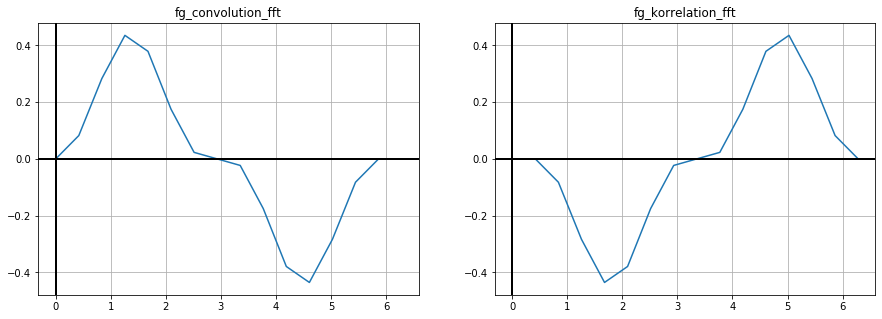

In [138]:
pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(x, fg_convolution)
pl.title("fg_convolution_fft")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(x, fg_korrelation)
pl.title("fg_korrelation_fft")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

print("Classic conv + corr count of mul and sum:", count_sum_korr + count_mul_korr + count_sum_conv + count_mul_conv)

print("FFT conv + corr count of mul and sum:", count_mul_korr_fft + count_mul_conv_fft)